# Objective : Wine Quality Regression

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Regression (Using the ML)


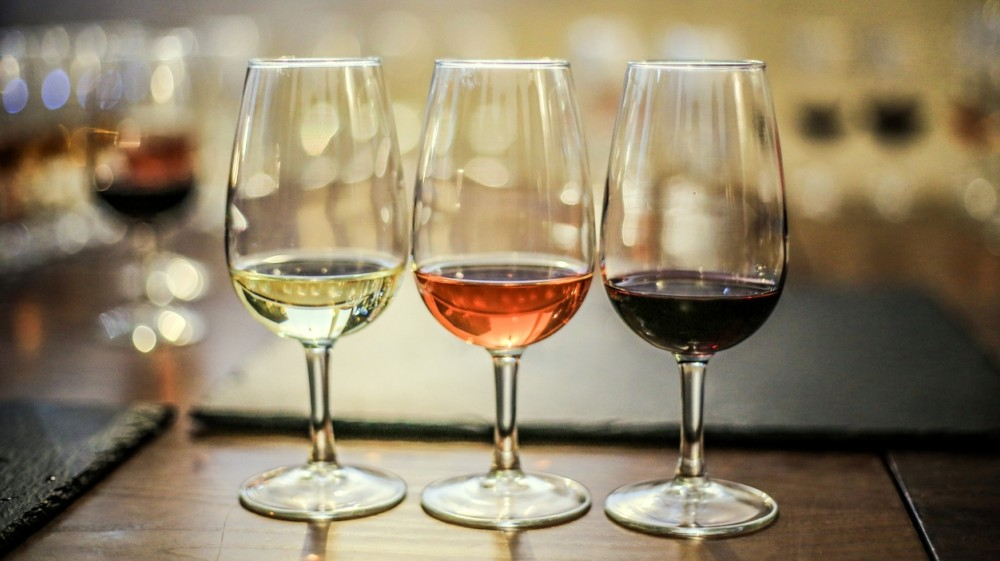

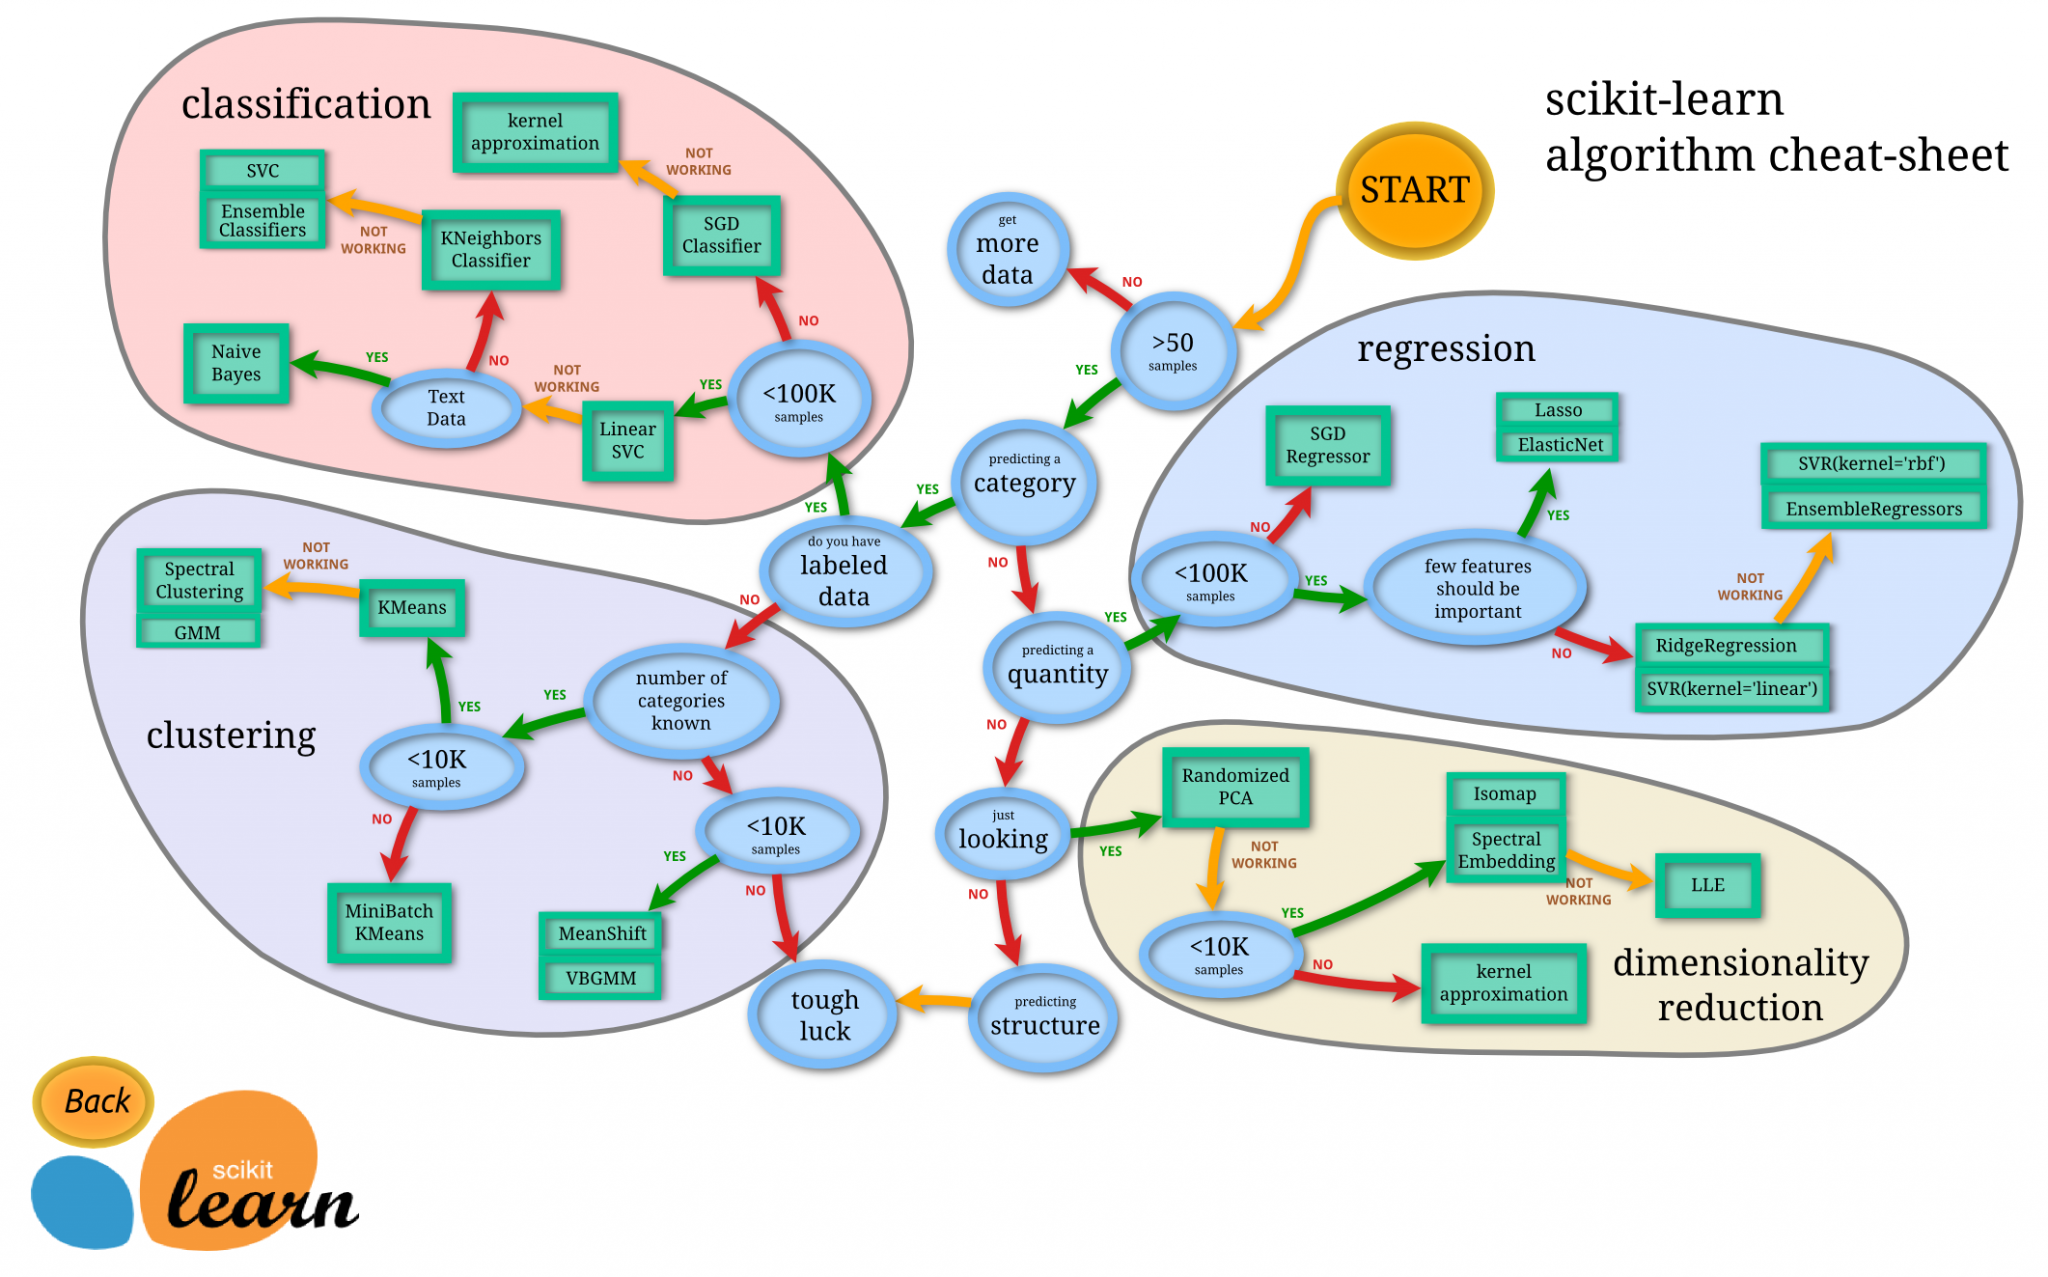

# 1. Load Python Modules

In [21]:
#  Use Python's import statement to load modules 
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 2. Read the Dataset from CSV file  - Using Pandas

In [22]:
file_path=r"winequality_red.csv"
wine_df=pd.read_csv(file_path)
wine_df.dropna(inplace=True,ignore_index=True)
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4      5.0  
1         9.8      5.0  
2         9.8      5.0  
3         9.8      6.0  
4         9.4      5.0  
...       ...      ...  
1594     10.5      5.0  
1595     11.2      6.0  
1596     11.0      6.0  
1597     10.2      5.0  
1598     11.0      6.0  

[1599 rows x 12 columns]

# 3. Basic Inspection on given dataset

In [23]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(wine_df)


top 5 rows - using head
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.

In [24]:
  
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

# 4. Handling Missing Values - Categorical - Variables

In [25]:
# check for missing values - for confirmation
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

In [26]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

In [27]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(wine_df)

# 6. Handling Missing Values in Numerical Columns

In [28]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

In [30]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()        
        

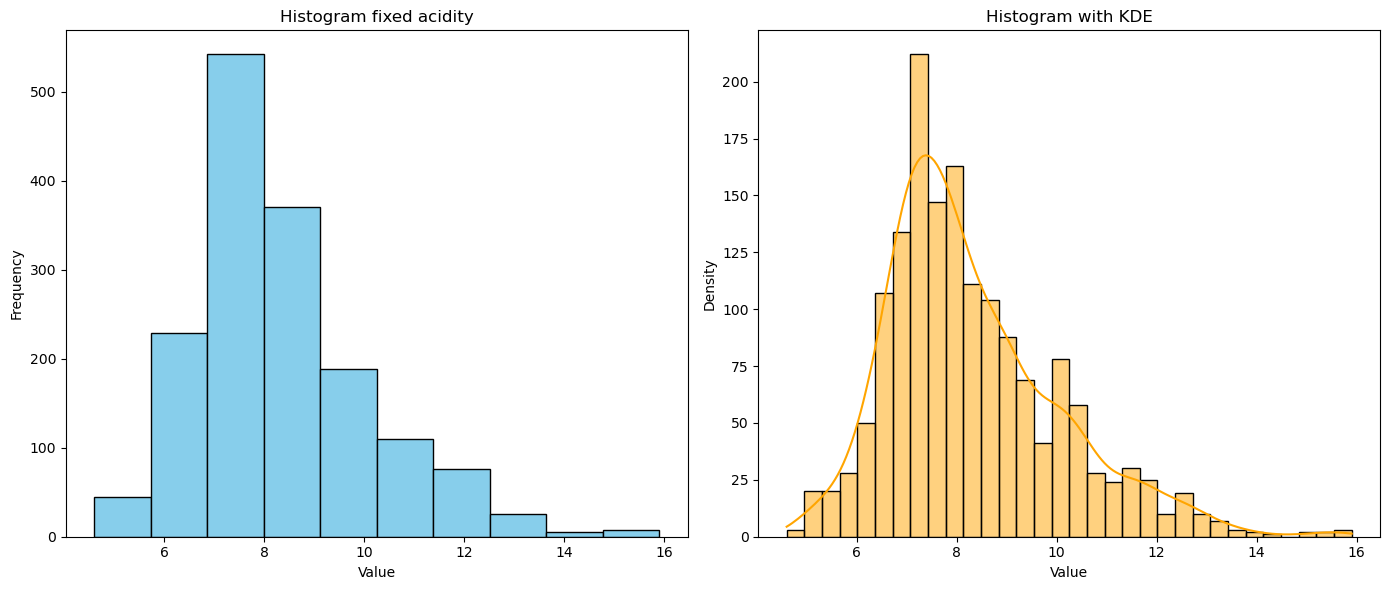

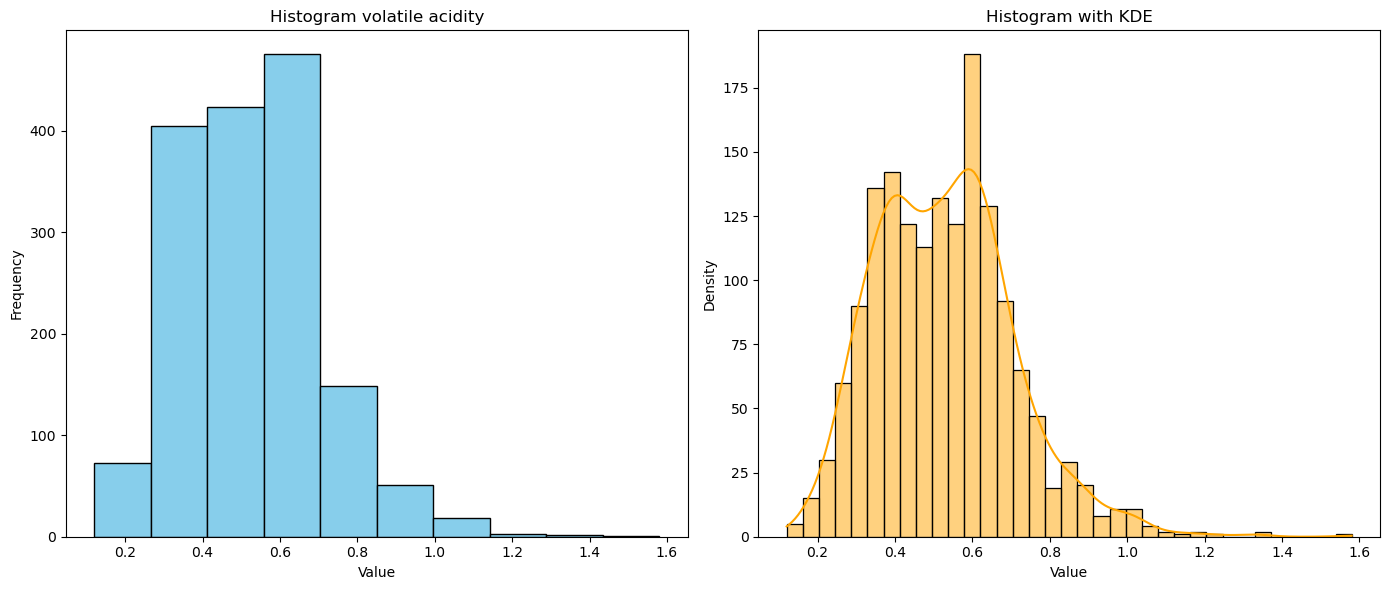

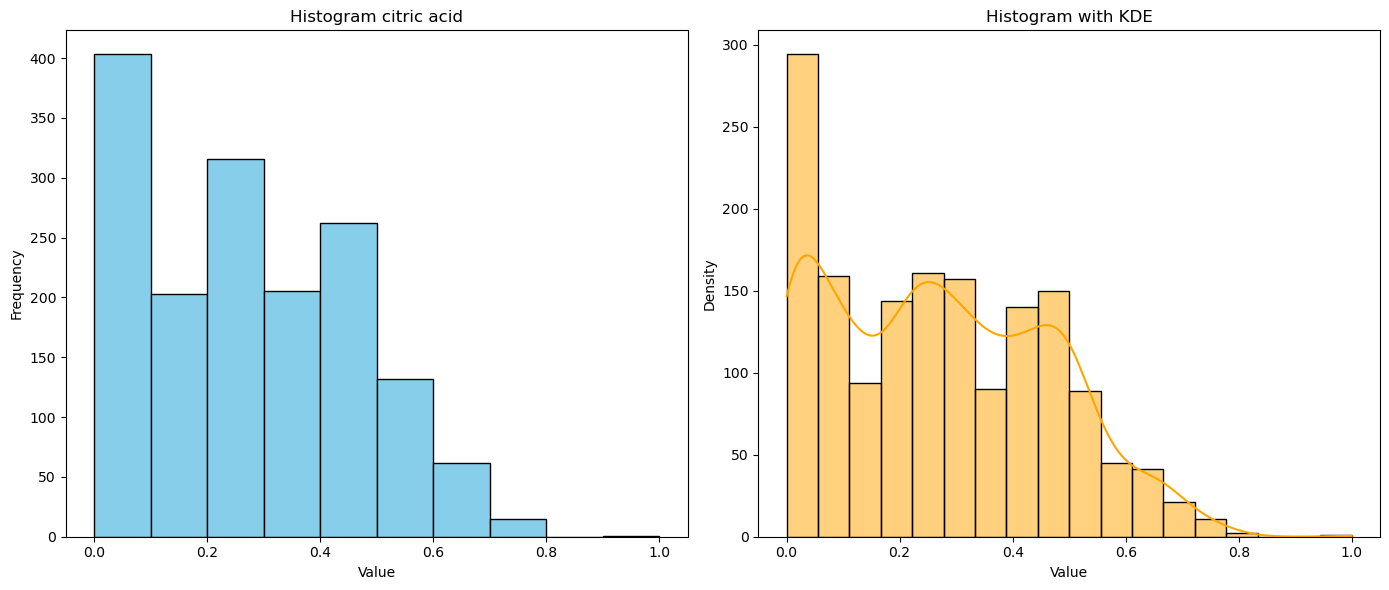

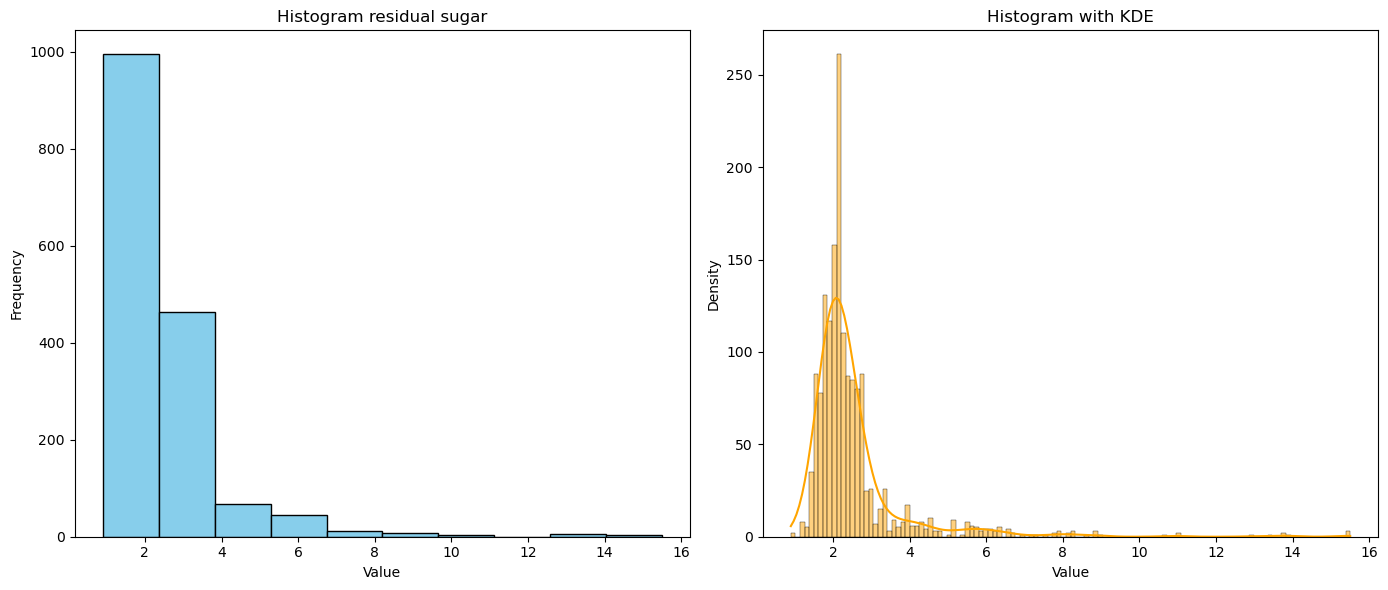

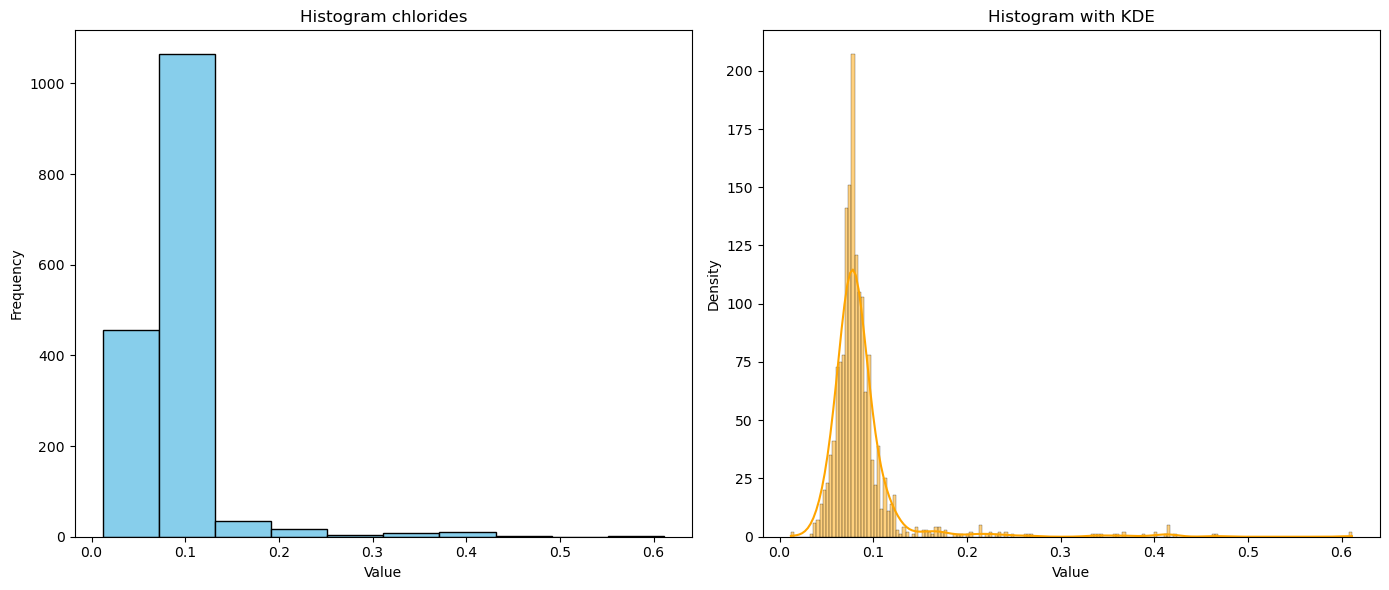

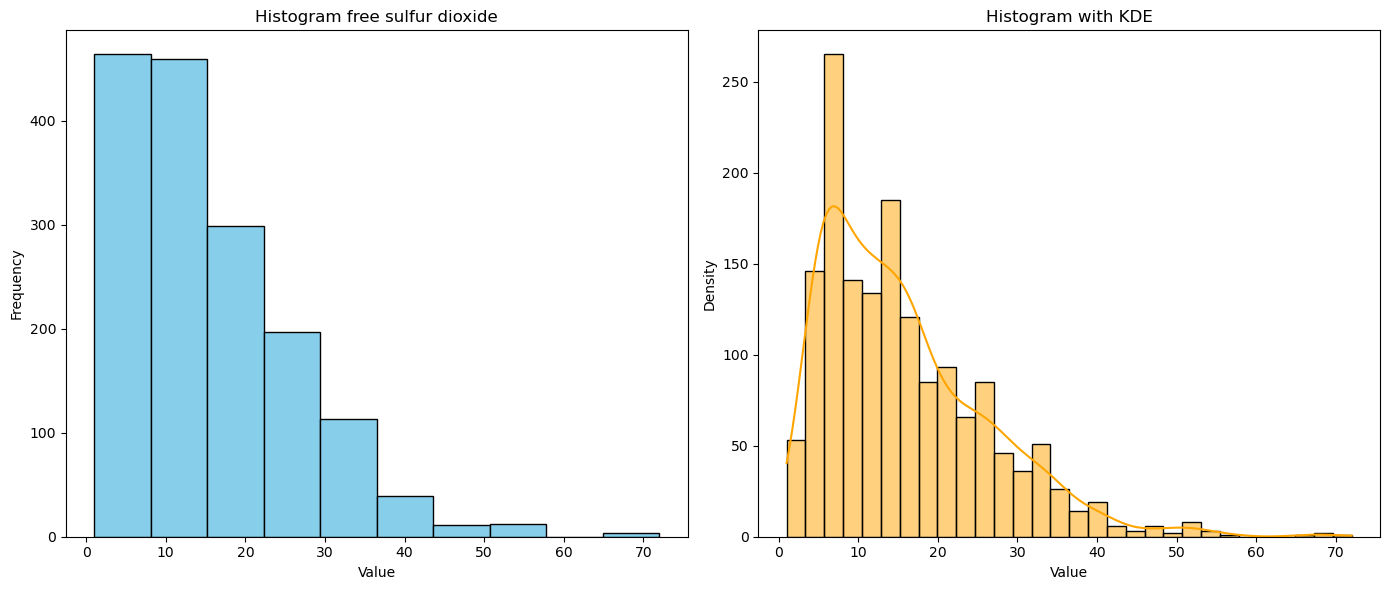

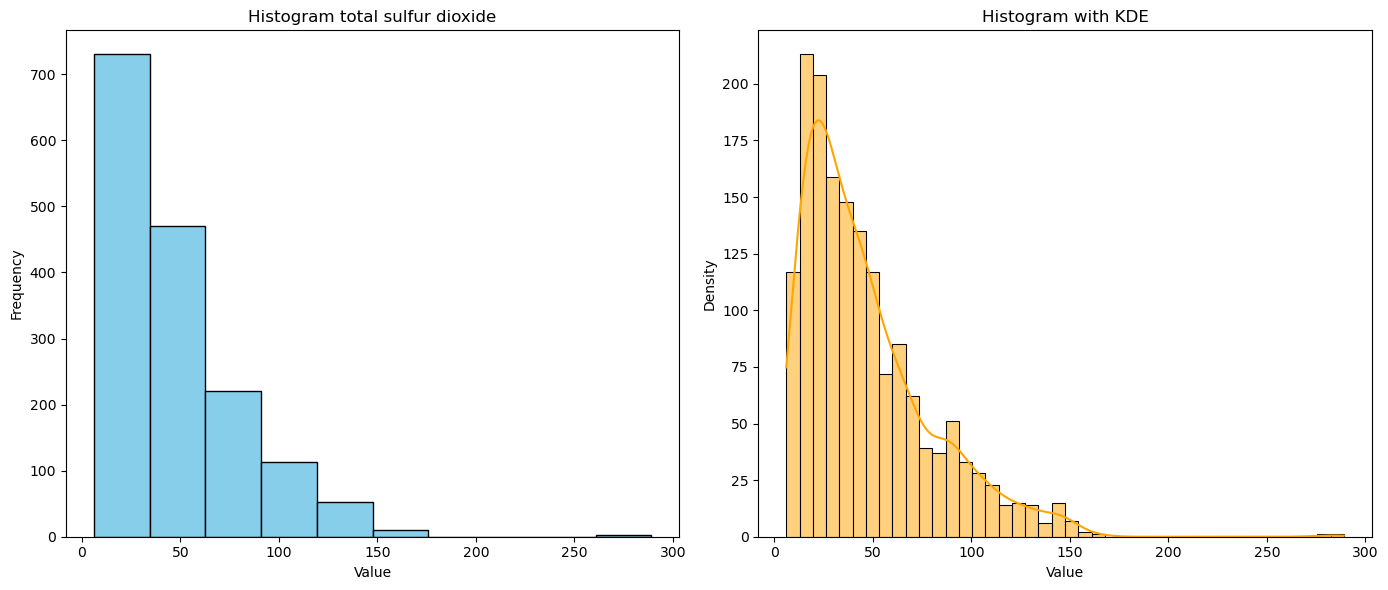

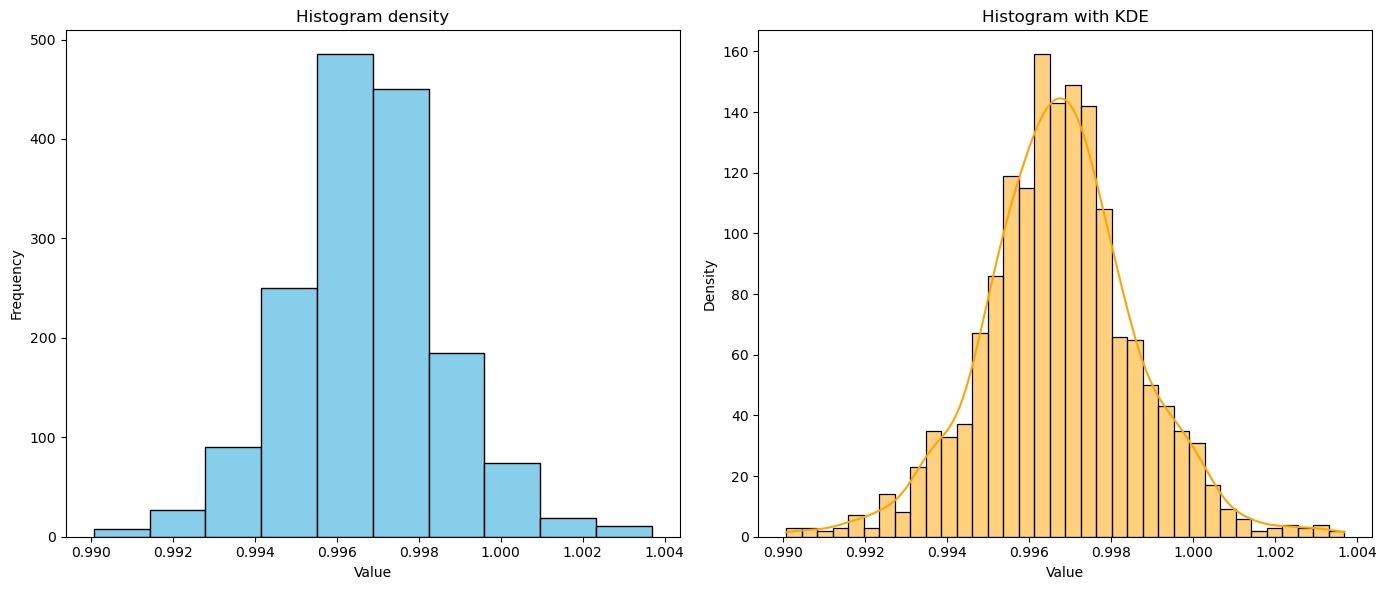

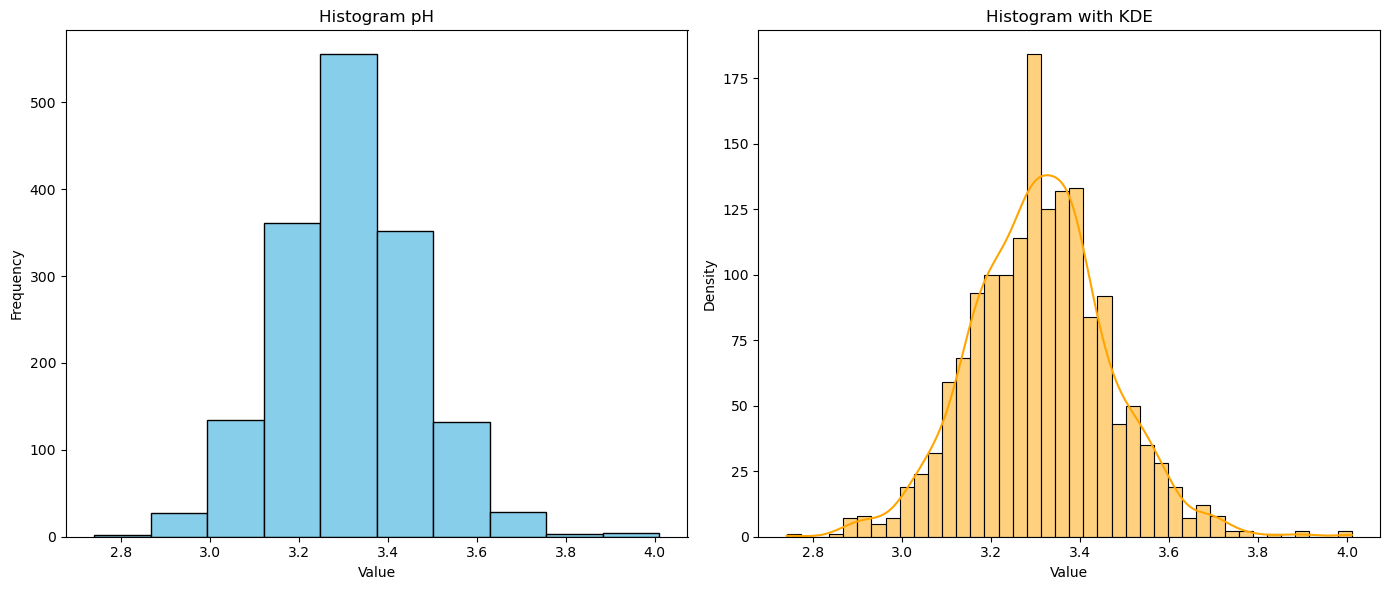

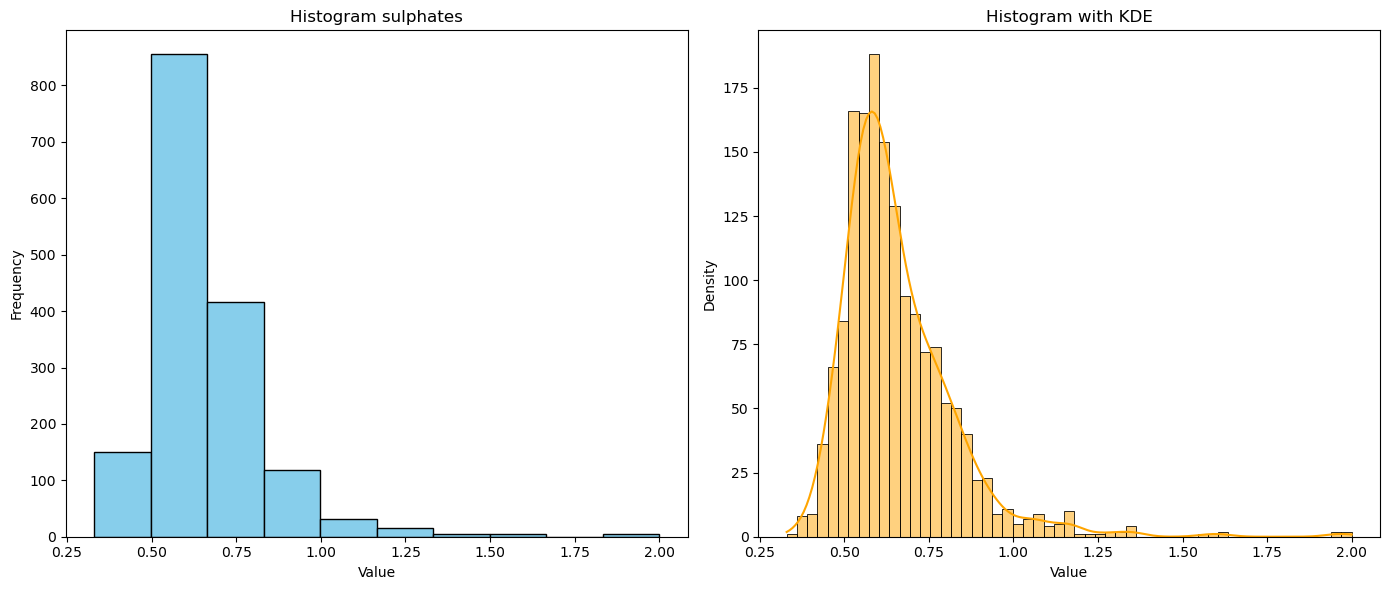

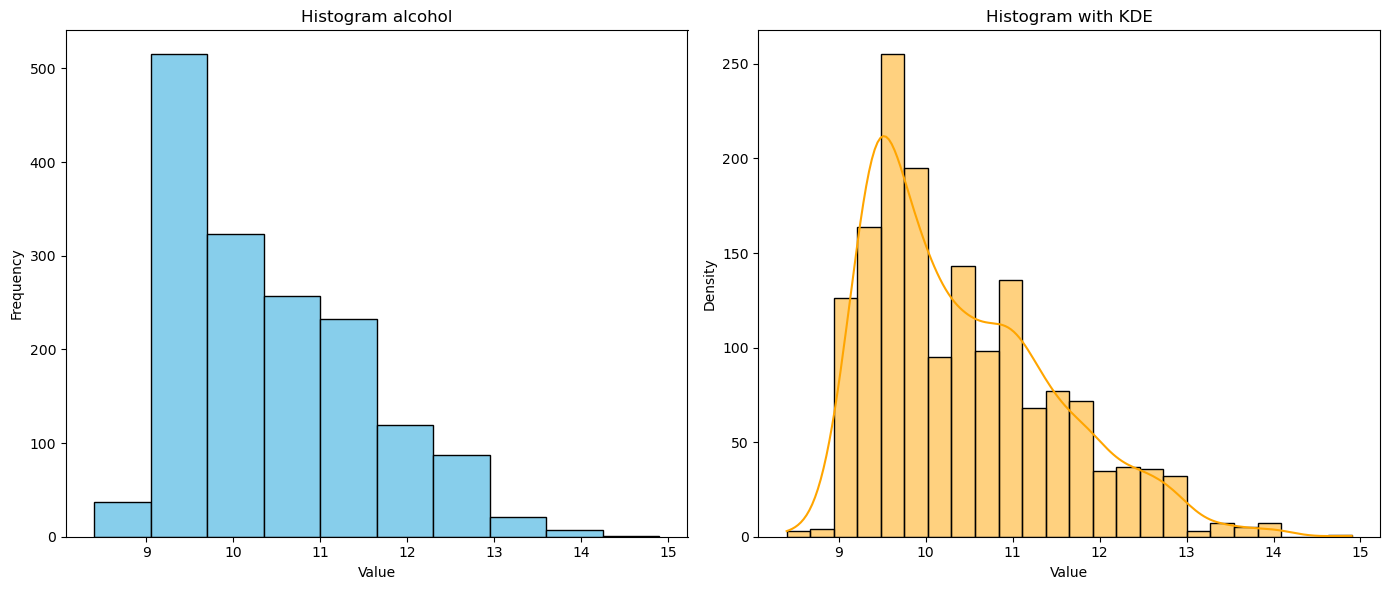

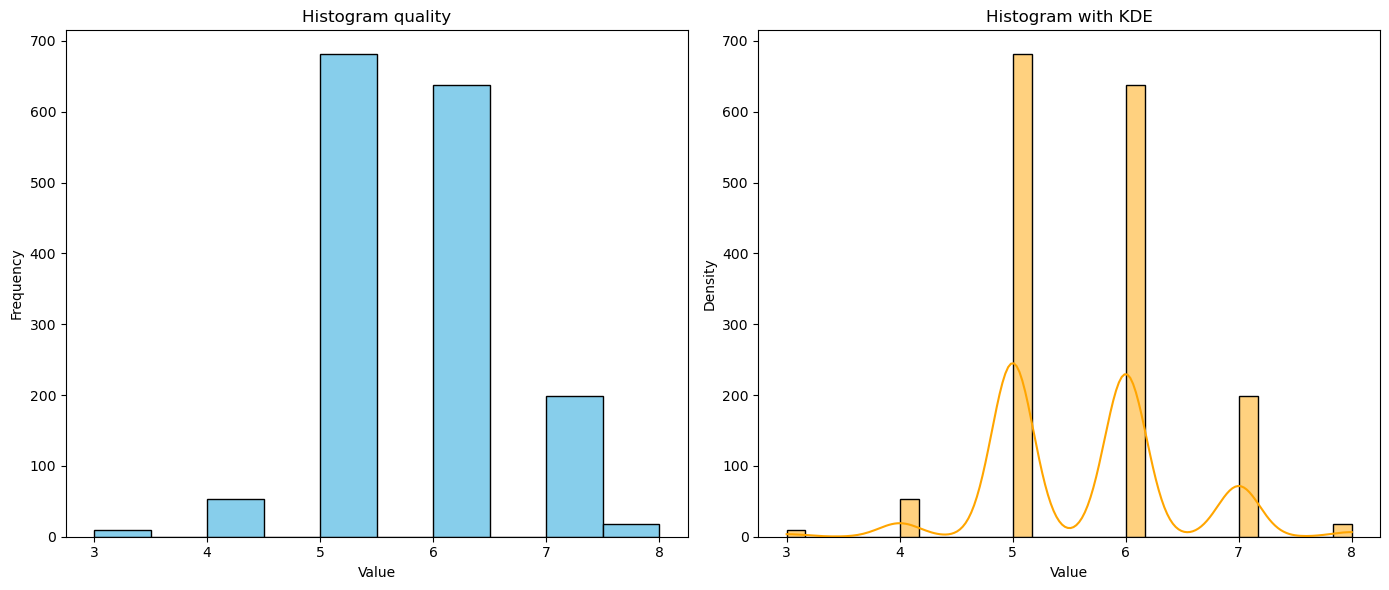

In [31]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(wine_df)

In [32]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

$ Observations $
1. All most all are normally distributed -except few

# 8. Numerical - Variables -Outliers Analysis - fillit

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

## 9.2 Num vs Num

In [33]:
 wine_df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

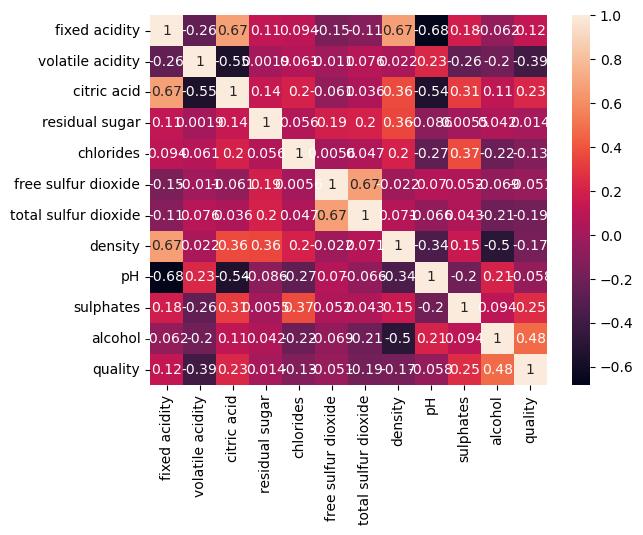

In [34]:
corr_mat=wine_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

$ Observations $
1. Alcohol , volatile acidity,  sulphates,  citric acid  -  are highly correlated to target

# 11. Standization - Normalization

# 12. Convert Cat - to - Numerical Columns

## VIF

# 14  ML Models

In [35]:
Y=wine_df["quality"]
X=wine_df.drop(["quality"],axis='columns')
print(len(Y),len(X))
print(X.columns)

1599 1599
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 42) 
# random_state = every possible combination represent as number - 42 , possibily
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


## 14.1 Linear Regression

In [37]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [38]:
model_results = {}
def regression_matrix(model ,X_train,X_test,y_test, model_name):
    print("Model Name ",model_name)
    y_pred = model.predict(X_test)
    train_r2_score=round(model.score(X_train,y_train),3)
    print("train R2 Score:",train_r2_score)
    test_r2_score=round(model.score(X_test,y_test),3)
    print("Test R2 Score:",test_r2_score)
    print("Test R2 score:",r2_score(y_test,y_pred))
    
    mse = round(mean_squared_error(y_test,y_pred),3)
    print("MSE:",mse)
    #rmse=round(root_mean_squared_error(y_test,y_pred),3)
    rmse=round(np.sqrt(mse),3)
    print("RMSE:",rmse)
    adj_r2_score=round(adjusted_r_squared(y_test,y_pred,len(y_test),len(X_train.columns)),3)
    print("Adj-R Score",adj_r2_score)
    
    if abs(train_r2_score - test_r2_score) > .10:
        print("model :" , model_name ,"is overfitting")
    if train_r2_score < 0.50:
        print("model :" , model_name ,"is underfitting")
    
    model_results[model_name]=[train_r2_score,test_r2_score,adj_r2_score,mse,rmse]

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)
regression_matrix(lr ,X_train,X_test,y_test, "LinearReg")


columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Coefficients:  [ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]
Intercept: 17.96257834335416
Model Name  LinearReg
train R2 Score: 0.361
Test R2 Score: 0.351
Test R2 score: 0.3513885332517389
MSE: 0.411
RMSE: 0.641
Adj-R Score 0.336
model : LinearReg is underfitting


###  Lasso Regression - L1

In [40]:
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lasso_reg.coef_)
print('Intercept:',lasso_reg.intercept_)

regression_matrix(lasso_reg ,X_train,X_test,y_test, "Lasso")

columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Coefficients:  [ 0.01752463 -0.          0.          0.         -0.          0.00632277
 -0.00412139 -0.         -0.          0.          0.26512127]
Intercept: 2.80741030175525
Model Name  Lasso
train R2 Score: 0.248
Test R2 Score: 0.209
Test R2 score: 0.20887882853160988
MSE: 0.502
RMSE: 0.709
Adj-R Score 0.19
model : Lasso is underfitting


### Ridge Regression -L2

In [41]:
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

regression_matrix(ridge_reg ,X_train,X_test,y_test, "Ridge")

columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Coefficients:  [ 1.12502795e-02 -1.11133625e+00 -2.52900014e-01  1.47211579e-03
 -1.60012884e+00  4.68812574e-03 -3.28105780e-03 -9.47405448e-02
 -3.80414071e-01  7.82195581e-01  3.05794163e-01]
Intercept: 4.059738852904067
Model Name  Ridge
train R2 Score: 0.361
Test R2 Score: 0.351
Test R2 score: 0.35052847704189916
MSE: 0.412
RMSE: 0.642
Adj-R Score 0.335
model : Ridge is underfitting


### Elastic Net 

In [42]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', elastic_net.coef_)
print('Intercept:',elastic_net.intercept_)

regression_matrix(elastic_net ,X_train,X_test,y_test, "ElasticNet")

columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Coefficients:  [ 0.03598326 -0.          0.         -0.         -0.          0.00738313
 -0.00403607 -0.         -0.          0.          0.29923474]
Intercept: 2.2777670108331085
Model Name  ElasticNet
train R2 Score: 0.261
Test R2 Score: 0.225
Test R2 score: 0.22549880065276617
MSE: 0.491
RMSE: 0.701
Adj-R Score 0.207
model : ElasticNet is underfitting


## 14.2 Decision Tree Regression

In [43]:
# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
print("Model - Decision Tree Regression")

regression_matrix(model ,X_train,X_test,y_test, "DT")

Model - Decision Tree Regression
Model Name  DT
train R2 Score: 1.0
Test R2 Score: 0.004
Test R2 score: 0.0043743453884542705
MSE: 0.631
RMSE: 0.794
Adj-R Score -0.019
model : DT is overfitting


## 14.3 Random Forest Regression

In [44]:
# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model - Random Forest Regression")

regression_matrix(model ,X_train,X_test,y_test, "RandomForest")

Model - Random Forest Regression
Model Name  RandomForest
train R2 Score: 0.922
Test R2 Score: 0.46
Test R2 score: 0.45989016901813407
MSE: 0.342
RMSE: 0.585
Adj-R Score 0.447
model : RandomForest is overfitting


## 14.4 Support Vector Regression (SVR)

In [45]:
# Create and fit the model
model = SVR(kernel='linear')
model.fit(X_train, y_train)
print("Model - Support Vector Regression ")

regression_matrix(model ,X_train,X_test,y_test, "SVR")

Model - Support Vector Regression 
Model Name  SVR
train R2 Score: 0.35
Test R2 Score: 0.333
Test R2 score: 0.3325215634836127
MSE: 0.423
RMSE: 0.65
Adj-R Score 0.317
model : SVR is underfitting


## 14.5 AdaBoost Regression

In [46]:
# Create and fit the model
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train)
print("Model - AdaBoost Regression ")

regression_matrix(ada_boost ,X_train,X_test,y_test, "AdaBoost")

Model - AdaBoost Regression 
Model Name  AdaBoost
train R2 Score: 0.485
Test R2 Score: 0.376
Test R2 score: 0.37645661536979214
MSE: 0.395
RMSE: 0.628
Adj-R Score 0.362
model : AdaBoost is overfitting
model : AdaBoost is underfitting


## 14.6 Gradient Boosting Regression

In [47]:
# Create and fit the model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, y_train)
print("Model - Gradient Boosting Regression")

regression_matrix(gradient_boost ,X_train,X_test,y_test, "GradientBoost")

Model - Gradient Boosting Regression
Model Name  GradientBoost
train R2 Score: 0.664
Test R2 Score: 0.394
Test R2 score: 0.3941161813932801
MSE: 0.384
RMSE: 0.62
Adj-R Score 0.38
model : GradientBoost is overfitting


## 14.7 XGBoost Regression

In [48]:
# Create and fit the model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
print("Model-XGBoost Regression")

regression_matrix(xg_boost ,X_train,X_test,y_test, "XGB")

Model-XGBoost Regression
Model Name  XGB
train R2 Score: 0.998
Test R2 Score: 0.357
Test R2 score: 0.35675606403028626
MSE: 0.408
RMSE: 0.639
Adj-R Score 0.342
model : XGB is overfitting


## 18. Summary

In [49]:
print("\n\n")
result=pd.DataFrame(model_results,index=["Train R2","Test R2" ,"Adj R2","MSE","RMSE"])
print(result)
print("\n\n")

print(tabulate(result, headers='keys', tablefmt='pretty'))




          LinearReg  Lasso  Ridge  ElasticNet     DT  RandomForest    SVR  \
Train R2      0.361  0.248  0.361       0.261  1.000         0.922  0.350   
Test R2       0.351  0.209  0.351       0.225  0.004         0.460  0.333   
Adj R2        0.336  0.190  0.335       0.207 -0.019         0.447  0.317   
MSE           0.411  0.502  0.412       0.491  0.631         0.342  0.423   
RMSE          0.641  0.709  0.642       0.701  0.794         0.585  0.650   

          AdaBoost  GradientBoost    XGB  
Train R2     0.485          0.664  0.998  
Test R2      0.376          0.394  0.357  
Adj R2       0.362          0.380  0.342  
MSE          0.395          0.384  0.408  
RMSE         0.628          0.620  0.639  



+----------+-----------+-------+-------+------------+--------+--------------+-------+----------+---------------+-------+
|          | LinearReg | Lasso | Ridge | ElasticNet |   DT   | RandomForest |  SVR  | AdaBoost | GradientBoost |  XGB  |
+----------+-----------+-------